## **MACHINE LEARNING FOR REGRESSION MODEL**
### **Machine Learning Models for Regression Analysis: KNN and SVM for Predicting Systolic Blood Pressure**

Predicting **Systolic Blood Pressure (SBP)** is an important task in medical research and clinical decision-making. SBP is a continuous variable representing the pressure exerted on arterial walls during heart contraction. Because it is continuous, this problem falls under **regression analysis** rather than classification. Machine learning regression models are particularly useful when the relationship between predictors (such as age, BMI, creatinine level, or HIV status) and SBP is complex and potentially non-linear. Two powerful machine learning approaches for regression are **K-Nearest Neighbors (KNN) Regression** and **Support Vector Machine (SVM) Regression**, also known as Support Vector Regression (SVR).

### 1. K-Nearest Neighbors (KNN) Regression

KNN is a non-parametric, instance-based learning algorithm. Unlike traditional regression models that estimate explicit parameters, KNN makes predictions based on the similarity between observations in the dataset.

In KNN regression, the predicted SBP for a new observation is calculated as the average (or weighted average) of the SBP values of the *k* closest observations in the training data. Closeness is usually determined using distance metrics such as Euclidean distance.

The main idea is simple:

* Identify the *k* nearest data points to the new individual based on predictor variables.
* Compute the mean SBP of these neighbors.
* Use that mean as the predicted SBP.

Key characteristics of KNN regression include:

* It does not assume linearity between predictors and SBP.
* It is sensitive to the scale of variables; therefore, feature scaling (e.g., StandardScaler) is essential.
* The choice of *k* significantly affects performance. Small *k* may cause overfitting, while large *k* may lead to underfitting.

Advantages of KNN include simplicity and flexibility in capturing nonlinear patterns. However, it can be computationally expensive for large datasets and sensitive to irrelevant features.

### 2. Support Vector Machine (SVM) Regression

Support Vector Regression (SVR) is a powerful supervised learning algorithm derived from Support Vector Machines. Unlike KNN, SVR is a margin-based method that attempts to find a function that best approximates the relationship between predictors and SBP while maintaining model simplicity.

The core idea of SVR is to fit a regression line (or hyperplane) such that most data points lie within a specified error margin, called epsilon (ε). Instead of minimizing squared errors directly, SVR minimizes a loss function that penalizes errors larger than ε while ignoring smaller errors.

Important components of SVR include:

* The kernel function, which allows modeling nonlinear relationships. Common kernels include linear, polynomial, and radial basis function (RBF).
* The regularization parameter (C), which controls the trade-off between model complexity and training error.
* The epsilon parameter (ε), which defines the acceptable error margin.

SVR is particularly effective when:

* The relationship between predictors and SBP is nonlinear.
* The dataset has high dimensionality.
* Robust performance is required even with complex data structures.

However, SVR requires careful tuning of hyperparameters and can be computationally intensive for very large datasets.

### 3. Comparison of KNN and SVM for SBP Prediction

Both KNN and SVR are suitable for predicting systolic blood pressure, especially when relationships between clinical variables and SBP are not strictly linear. KNN relies on local similarity and performs well when similar patients tend to have similar SBP levels. In contrast, SVR constructs a global model that optimally balances prediction error and model complexity.

In practice:

* KNN may perform better with smaller datasets and smooth data patterns.
* SVR often provides better generalization when nonlinear relationships exist.
* Feature scaling is crucial for both models.
* Model performance should be evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

### Conclusion

KNN regression and Support Vector Regression are powerful machine learning techniques for predicting systolic blood pressure. KNN is intuitive and locally adaptive, while SVR is mathematically rigorous and capable of modeling complex nonlinear relationships. Proper preprocessing, hyperparameter tuning, and model evaluation are essential to obtain accurate and reliable SBP predictions in clinical research settings.


### **Load the Needeed Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Initialize Data Importation**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving htn_dat.csv to htn_dat.csv


#### **Read the Data as CSV data frame**

In [3]:
df = pd.read_csv('htn_dat.csv')
df.head()

,ID,DBP,SBP,BMI,age,married,male.gender,hgb_centered,adv_HIV,survtime,event,arv_naive,urban.clinic,log_creat_centered,IPW_weight,SBP_ge120
0,16097,60,90,NaN,28.000000,0.0,0,NaN,NaN,338,1,1,0,NaN,0.924379,0
1,930,75,110,27.339912,26.458590,1.0,0,-3.9,0.0,439,1,1,1,5.421770e-02,1.163862,0
2,6877,60,80,17.689789,42.951405,0.0,0,-3.2,NaN,752,1,1,0,-3.597409e-01,0.721148,0
3,36464,60,90,19.854080,50.149212,1.0,1,NaN,NaN,526,1,1,1,NaN,0.829452,0
4,36180,60,100,21.295294,30.554415,0.0,1,-0.4,NaN,215,1,1,0,-1.000000e-07,0.856046,0


### **View Variables Definition and their Measurements**

In [4]:
import pandas as pd
from IPython.display import display, HTML

# Create variable dictionary
variables_dict = pd.DataFrame({
    'Variable': [
        'ID', 'DBP', 'SBP', 'BMI', 'age', 'married', 'male.gender',
        'hgb_centered', 'adv_HIV', 'survtime', 'event', 'arv_naive',
        'urban.clinic', 'log_creat_centered', 'IPW_weight', 'SBP_ge120'
    ],
    'Type': [
        'Integer', 'Integer', 'Integer', 'Float', 'Float', 'Binary', 'Binary',
        'Float', 'Binary', 'Integer', 'Binary', 'Binary',
        'Binary', 'Float', 'Float', 'Binary'
    ],
    'Description': [
        'Unique patient identifier',
        'Diastolic blood pressure',
        'Systolic blood pressure',
        'Body Mass Index',
        'Patient age in years',
        'Marital status',
        'Gender indicator',
        'Hemoglobin (centered around mean)',
        'Advanced HIV disease status',
        'Survival time in days',
        'Event indicator (hypertension onset)',
        'Antiretroviral therapy naive status',
        'Clinic location',
        'Log-transformed creatinine (centered)',
        'Inverse probability weighting weight',
        'Hypertension indicator (SBP ≥ 120 mmHg)'
    ],
    'Values / Units': [
        'Unique ID',
        'mmHg',
        'mmHg',
        'kg/m²',
        'Years',
        '1 = Married, 0 = Not married',
        '1 = Male, 0 = Female',
        'g/dL (mean-centered)',
        '1 = Yes, 0 = No, NA = Missing',
        'Days',
        '1 = Event occurred, 0 = Censored',
        '1 = Naive, 0 = Experienced',
        '1 = Urban, 0 = Rural',
        'log(mg/dL) (centered)',
        'Continuous weight',
        '1 = Hypertensive, 0 = Normotensive'
    ],
    'Notes': [
        'The-identified patient ID',
        'Normal range: 60–80 mmHg',
        'Primary outcome variable',
        'Missing values present (NA)',
        'Range: 16–80 years',
        'Self-reported status',
        'Biological sex assigned at birth',
        'Centered = raw value minus cohort mean',
        'CD4 <200 cells/μL or WHO Stage 3/4',
        'Time to hypertension diagnosis or censoring',
        'Primary outcome for survival analysis',
        'Never received ARVs before enrollment',
        'Based on clinic administrative location',
        'Centered for modeling stability',
        'For causal inference adjustment',
        'Clinical threshold per WHO guidelines'
    ]
})

# Display as styled table
display(HTML(
    variables_dict.to_html(
        index=False,
        classes='table table-striped',
        escape=False
    ).replace(
        '<table border="1" class="dataframe table table-striped">',
        '<table class="table table-hover" style="width:100%; border-collapse:collapse; font-family:Arial, sans-serif;">'
    ).replace(
        '<th>',
        '<th style="background-color:#2c3e50; color:white; padding:12px; text-align:left; font-weight:bold;">'
    ).replace(
        '<td>',
        '<td style="padding:10px; border-bottom:1px solid #ddd;">'
    ).replace(
        '<tr>',
        '<tr style="border-top:2px solid #2c3e50;">'
    )
))

Variable,Type,Description,Values / Units,Notes
ID,Integer,Unique patient identifier,Unique ID,The-identified patient ID
DBP,Integer,Diastolic blood pressure,mmHg,Normal range: 60–80 mmHg
SBP,Integer,Systolic blood pressure,mmHg,Primary outcome variable
BMI,Float,Body Mass Index,kg/m²,Missing values present (NA)
age,Float,Patient age in years,Years,Range: 16–80 years
married,Binary,Marital status,"1 = Married, 0 = Not married",Self-reported status
male.gender,Binary,Gender indicator,"1 = Male, 0 = Female",Biological sex assigned at birth
hgb_centered,Float,Hemoglobin (centered around mean),g/dL (mean-centered),Centered = raw value minus cohort mean
adv_HIV,Binary,Advanced HIV disease status,"1 = Yes, 0 = No, NA = Missing",CD4 <200 cells/μL or WHO Stage 3/4
survtime,Integer,Survival time in days,Days,Time to hypertension diagnosis or censoring


### **Data Cleaning Process**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4999 non-null   int64  
 1   DBP                 4999 non-null   int64  
 2   SBP                 4999 non-null   int64  
 3   BMI                 4329 non-null   float64
 4   age                 4999 non-null   float64
 5   married             4835 non-null   float64
 6   male.gender         4999 non-null   int64  
 7   hgb_centered        3605 non-null   float64
 8   adv_HIV             3038 non-null   float64
 9   survtime            4999 non-null   int64  
 10  event               4999 non-null   int64  
 11  arv_naive           4999 non-null   int64  
 12  urban.clinic        4999 non-null   int64  
 13  log_creat_centered  3461 non-null   float64
 14  IPW_weight          4999 non-null   float64
 15  SBP_ge120           4999 non-null   int64  
dtypes: flo

### **Check for the Missing Obervations**

In [6]:
df.isna().sum()

,0
ID,0
DBP,0
SBP,0
BMI,670
age,0
married,164
male.gender,0
hgb_centered,1394
adv_HIV,1961
survtime,0


### **Visualize the Number of Missing Obervations**

/tmp/ipython-input-1370644638.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Missing Percentage', y='Variable', data=missing_df, palette='viridis')


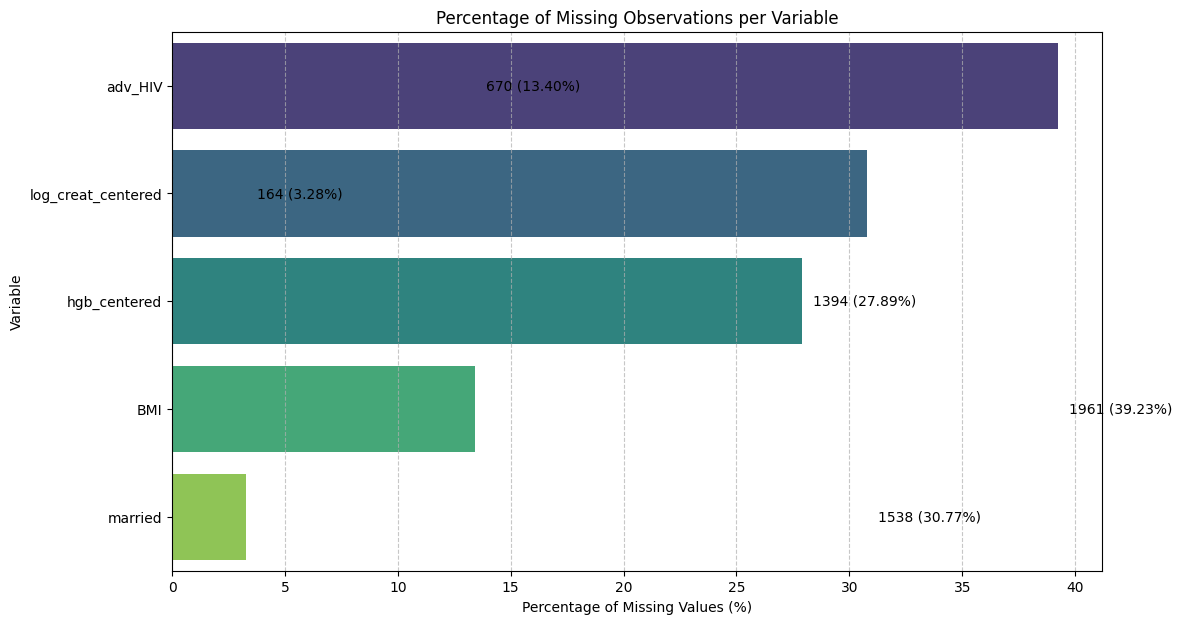

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Calculate percentages
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame for plotting
missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percentage.values
})

# Sort by missing percentage
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Missing Percentage', y='Variable', data=missing_df, palette='viridis')
plt.title('Percentage of Missing Observations per Variable')
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Variable')

# Add frequency and percentage labels to the bars
for index, row in missing_df.iterrows():
    plt.text(row['Missing Percentage'] + 0.5, index,
             f"{row['Missing Count']} ({row['Missing Percentage']:.2f}%)",
             color='black', va="center")

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### **Delete with Missing Values**

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

,0
ID,0
DBP,0
SBP,0
BMI,0
age,0
married,0
male.gender,0
hgb_centered,0
adv_HIV,0
survtime,0


### **Identify X [Features] and Y [Systolic Blood Pressure]**

In [10]:
X = df[['age', 'BMI', 'IPW_weight', 'hgb_centered', 'log_creat_centered', 'survtime', 'urban.clinic', 'married', 'male.gender', 'adv_HIV']]
y = df['SBP']

In [11]:
X.head()

,age,BMI,IPW_weight,hgb_centered,log_creat_centered,survtime,urban.clinic,married,male.gender,adv_HIV
1,26.458590,27.339912,1.163862,-3.90,0.054218,439,1,1.0,0,0.0
11,40.531143,23.068195,0.856046,-3.93,0.223143,914,0,1.0,1,1.0
12,32.919918,21.989893,0.916506,-1.30,-0.278203,23,1,1.0,0,1.0
17,36.596851,20.983988,0.667708,1.10,0.013621,356,0,0.0,1,0.0
22,42.488705,15.396691,0.829452,-0.80,0.068993,439,1,1.0,1,1.0


In [12]:
y.head()

,SBP
1,110
11,120
12,127
17,110
22,100


### **Data Partitioning for Machine Learning**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Train the KNN Model for Regression Analysis**

#### **Load the Reqquired Functionality and Libraries**

In [38]:
from sklearn.neighbors import KNeighborsRegressor

#### **Initialize the the Default KNN Regressor model**

In [39]:
k_neighbors_regressor = KNeighborsRegressor()

In [40]:
k_neighbors_regressor.fit(X_train, y_train)

KNeighborsRegressor()

# **Train the Optimize KNN model**

## **Optimize KNN Regressor (n_neighbors)**
Optimize the KNN Regressor by tuning the `n_neighbors` hyperparameter using GridSearchCV to find the best value for `k`.

**Reasoning**:
To optimize the KNN Regressor, I will import `GridSearchCV` and `KNeighborsRegressor`, define a parameter grid for `n_neighbors`, initialize `GridSearchCV` with these components, fit it to the training data, and then extract and print the best `n_neighbors` and store the best estimator.

## Evaluate Optimized KNN Regressor
Make predictions on the test data using the optimized KNN regressor, calculate regression metrics, and visualize its performance.

**Reasoning**:
First, we need to make predictions on the test data using the optimized KNN regressor (`best_knn_regressor`) and then calculate and print the regression metrics (MAE, MSE, RMSE, R-squared) to evaluate its performance, as this aligns with the first part of the instructions.



In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# 2. Define a parameter grid for n_neighbors
param_grid = {'n_neighbors': range(1, 31)}

# 3. Initialize GridSearchCV
# Using 'neg_mean_squared_error' because GridSearchCV maximizes the score, so we minimize negative MSE.
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)

# 4. Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# 5. Print the best n_neighbors found by GridSearchCV
print(f"Best n_neighbors: {grid_search.best_params_['n_neighbors']}")

# 6. Store the best estimator from GridSearchCV
best_knn_regressor = grid_search.best_estimator_
print("Optimized KNN Regressor stored as 'best_knn_regressor'.")

Best n_neighbors: 29
Optimized KNN Regressor stored as 'best_knn_regressor'.


#### **Model Evaluation**

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data using the optimized KNN regressor
y_pred_optimized = best_knn_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

# Calculate Mean Squared Error (MSE)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)

# Calculate Root Mean Squared Error (RMSE)
rmse_optimized = np.sqrt(mse_optimized)

# Calculate R-squared score
r2_optimized = r2_score(y_test, y_pred_optimized)

# Print the results for the optimized model
print("--- Optimized KNN Regressor Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.4f}")
print(f"R-squared (R2) Score: {r2_optimized:.4f}")

--- Optimized KNN Regressor Metrics ---
Mean Absolute Error (MAE): 11.6865
Mean Squared Error (MSE): 262.9615
Root Mean Squared Error (RMSE): 16.2161
R-squared (R2) Score: -0.0114


### **Plot the Optimized Results**

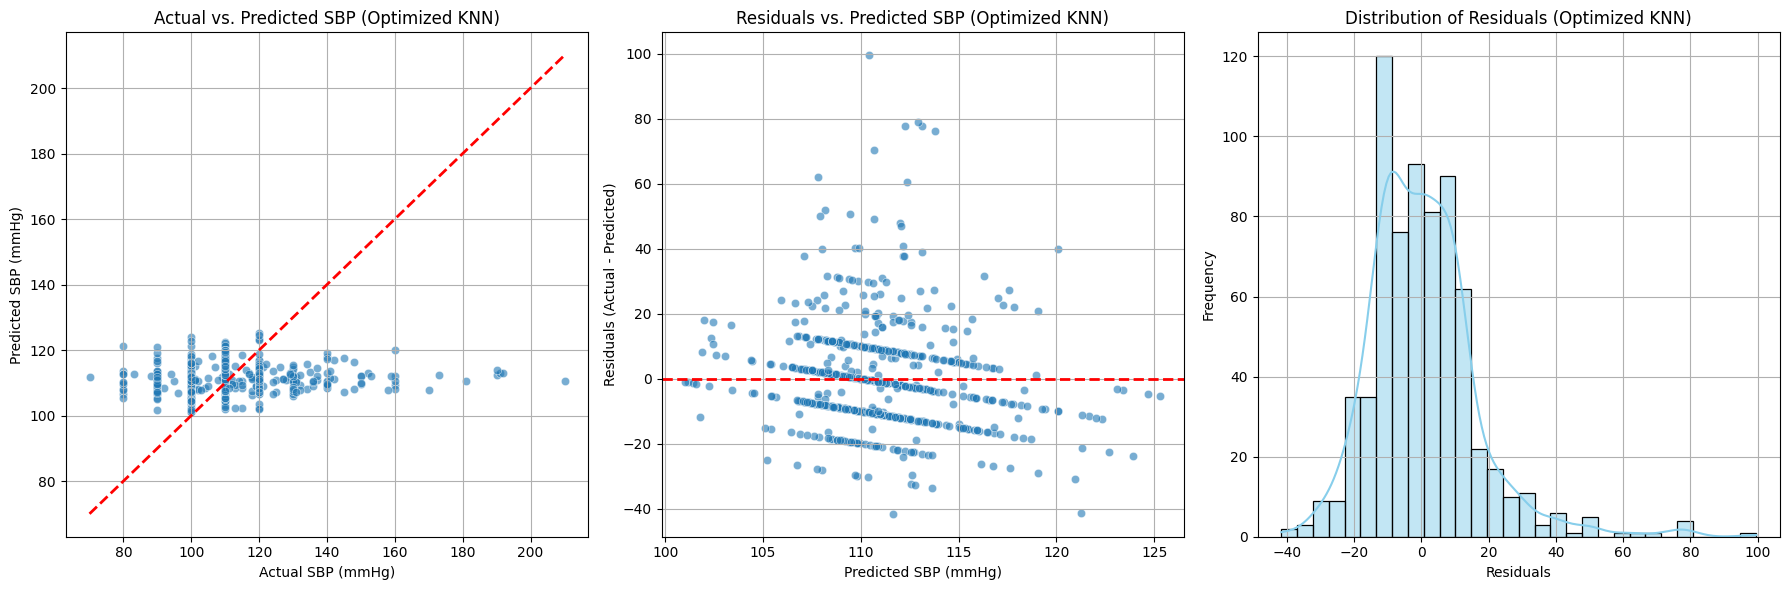

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a custom size
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs. Predicted Values
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x=y_test, y=y_pred_optimized, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted SBP (Optimized KNN)')
plt.xlabel('Actual SBP (mmHg)')
plt.ylabel('Predicted SBP (mmHg)')
plt.grid(True)

# Calculate residuals
residuals_optimized = y_test - y_pred_optimized

# Plot 2: Residuals vs. Predicted Values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_optimized, y=residuals_optimized, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted SBP (Optimized KNN)')
plt.xlabel('Predicted SBP (mmHg)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Plot 3: Distribution of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_optimized, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Residuals (Optimized KNN)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Support Vectors Machines (SVM)**

In [44]:
from sklearn.svm import SVR

# Instantiate an SVR model object
svr_model = SVR()
print("SVR model instantiated.")

# Train the SVR model using the training data
svr_model.fit(X_train, y_train)
print("SVR model trained successfully.")

SVR model instantiated.
SVR model trained successfully.


### **Prediction**

In [45]:
y_pred_svr = svr_model.predict(X_test)
print("Predictions on test set using SVR model have been made.")

Predictions on test set using SVR model have been made.


### **Calculate the Performance Metrics**

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Calculate Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred_svr)

# Calculate Root Mean Squared Error (RMSE)
rmse_svr = np.sqrt(mse_svr)

# Calculate R-squared score
r2_svr = r2_score(y_test, y_pred_svr)

# Print the results for the SVR model
print("--- SVR Model Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R-squared (R2) Score: {r2_svr:.4f}")

--- SVR Model Metrics ---
Mean Absolute Error (MAE): 11.2053
Mean Squared Error (MSE): 262.0592
Root Mean Squared Error (RMSE): 16.1882
R-squared (R2) Score: -0.0079


### **Regression Plots for SVM Model**

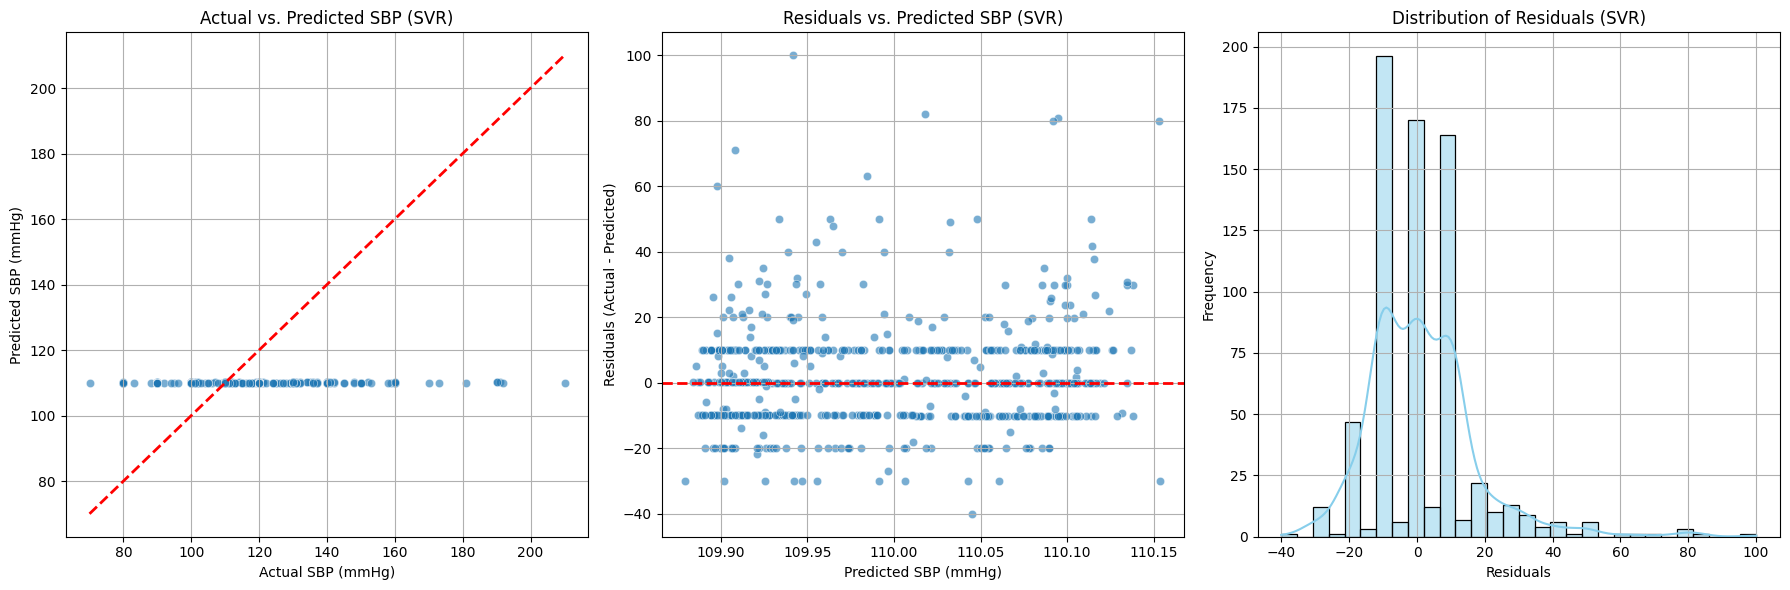

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a custom size
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs. Predicted Values
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted SBP (SVR)')
plt.xlabel('Actual SBP (mmHg)')
plt.ylabel('Predicted SBP (mmHg)')
plt.grid(True)

# Calculate residuals
residuals_svr = y_test - y_pred_svr

# Plot 2: Residuals vs. Predicted Values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_svr, y=residuals_svr, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted SBP (SVR)')
plt.xlabel('Predicted SBP (mmHg)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Plot 3: Distribution of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_svr, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Residuals (SVR)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Model's Performance Comparison**

In [48]:
import pandas as pd

# Create a dictionary to store the metrics
metrics_data = {
    'Optimized KNN': [
        mae_optimized,
        mse_optimized,
        rmse_optimized,
        r2_optimized
    ],
    'SVR': [
        mae_svr,
        mse_svr,
        rmse_svr,
        r2_svr
    ]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_data,
                          index=['MAE', 'MSE', 'RMSE', 'R-squared'])

In [49]:
# Print the comparison table
metrics_df

,Optimized KNN,SVR
MAE,11.686543,11.205320
MSE,262.961465,262.059173
RMSE,16.216087,16.188242
R-squared,-0.011354,-0.007884


The performance of the optimized K-Nearest Neighbors (KNN) regression model and the Support Vector Regression (SVR) model was evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).

The optimized KNN model produced an MAE of 11.69, an MSE of 262.96, and an RMSE of 16.22. Its R-squared value was −0.011. The SVR model yielded slightly better performance, with an MAE of 11.21, an MSE of 262.06, and an RMSE of 16.19. Its R-squared value was −0.008.

When comparing error metrics, SVR consistently performs marginally better than the optimized KNN model. The MAE is lower for SVR, indicating that, on average, its absolute prediction errors are slightly smaller. Similarly, SVR has lower MSE and RMSE values, meaning it produces slightly smaller squared errors and overall prediction deviations. Although the differences are small, SVR demonstrates more accurate predictions across all three error-based metrics.

However, both models have negative R-squared values. A negative R-squared indicates that the models perform worse than a simple baseline model that predicts the mean systolic blood pressure for all observations. This suggests that neither model captures sufficient explanatory power from the predictor variables. The low R-squared values indicate limited predictive strength and poor model fit.

Between the two models, SVR is recommended as the better model because it consistently produces lower prediction errors and a slightly improved R-squared value compared to KNN. Additionally, SVR is generally more robust in handling nonlinear relationships and high-dimensional data, which may be beneficial in medical datasets where relationships between predictors and systolic blood pressure are complex.

Nevertheless, the overall weak performance of both models suggests that further improvement is needed. Potential strategies include feature engineering, removal of irrelevant predictors, additional hyperparameter tuning, inclusion of more clinically relevant variables, or trying alternative regression models such as Random Forest or Gradient Boosting.


### **Feature Engineering and Determination of the Best Features for Predicting Systolic Blood Pressure**

To standardize the features as required by the subtask, I need to import StandardScaler, instantiate it, fit it on the training data, and then transform both training and test data.



In [50]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform both the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features X_train and X_test have been standardized.")

Features X_train and X_test have been standardized.


## Re-train Optimized KNN on Scaled Data

### Subtask:
Re-train the `best_knn_regressor` (with n_neighbors=29) using the now scaled training data to establish a baseline for feature importance calculation.


**Reasoning**:
To re-train the `best_knn_regressor` model with the scaled training data as instructed, I need to call its `fit` method using `X_train_scaled` and `y_train`.



In [51]:
best_knn_regressor.fit(X_train_scaled, y_train)
print("Optimized KNN Regressor has been re-trained on scaled data.")

Optimized KNN Regressor has been re-trained on scaled data.


## Calculate Feature Importance for KNN using Permutation Importance

### Subtask:
Use `sklearn.inspection.permutation_importance` to determine the importance of each feature for the re-trained KNN model. This method measures the decrease in a model's score when a single feature is randomly shuffled.


**Reasoning**:
To calculate feature importance for the re-trained KNN model using permutation importance, I need to import the necessary function, apply it to the scaled test data, extract the mean importances, and then organize these into a DataFrame with their corresponding feature names.



In [52]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Calculate permutation importance for the optimized KNN regressor
perm_importance = permutation_importance(
    best_knn_regressor,
    X_test_scaled,
    y_test,
    scoring='neg_mean_squared_error', # Using negative MSE as it's common for regression and grid search used it
    n_repeats=30,  # Number of times to permute a feature
    random_state=42
)

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort the features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature importance calculation complete and stored in 'feature_importances_df'.")
print(feature_importances_df)

Feature importance calculation complete and stored in 'feature_importances_df'.
              Feature  Importance
1                 BMI   12.931339
8         male.gender    8.361012
0                 age    5.503222
3        hgb_centered    3.354623
7             married    1.044377
4  log_creat_centered    0.763634
2          IPW_weight    0.330213
6        urban.clinic    0.170086
5            survtime    0.066392
9             adv_HIV   -1.652792


## Visualize Feature Importances

### Subtask:
Create a bar plot to visually represent the importance of each feature, making it easier to identify the 'best' or most relevant features.


**Reasoning**:
To visualize the feature importances as requested, I will create a bar plot using `seaborn.barplot` from the `feature_importances_df`, setting the appropriate axes and labels for clarity.



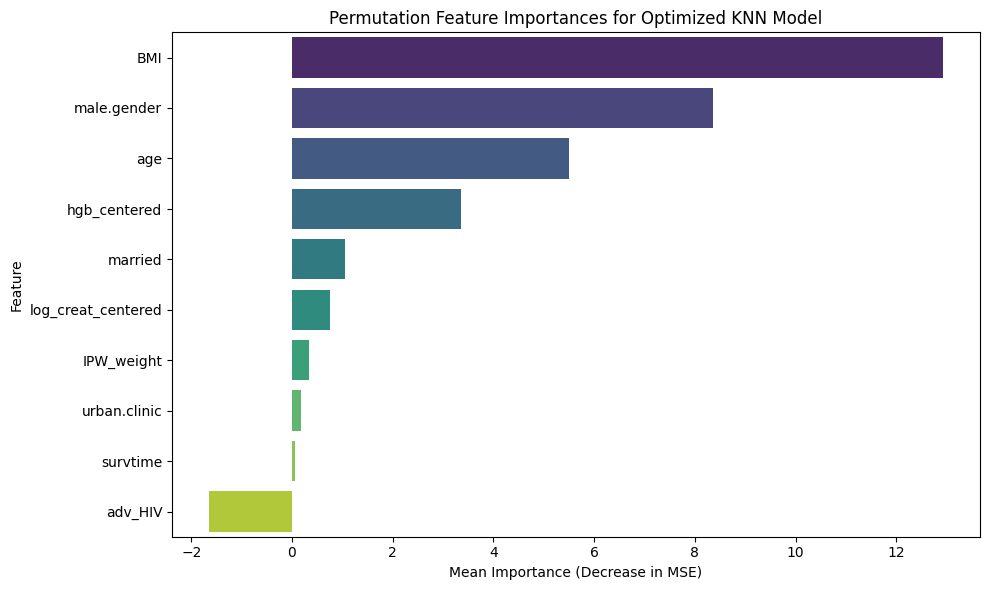

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis', hue='Feature', legend=False)
plt.title('Permutation Feature Importances for Optimized KNN Model')
plt.xlabel('Mean Importance (Decrease in MSE)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Interpreting Feature Importances

Based on the permutation importance analysis for the optimized KNN model, we can observe the following ranking of features by their mean importance (decrease in Mean Squared Error):

1.  **BMI (Body Mass Index)**: This feature shows the highest importance, indicating it is the most influential predictor in the model. A higher permutation importance value suggests that shuffling BMI significantly degrades the model's performance, implying its strong relationship with SBP.
2.  **male.gender**: Gender appears as the second most important feature, suggesting that it plays a substantial role in predicting SBP.
3.  **age**: Age is the third most important predictor, which is expected as SBP often correlates with age.
4.  **hgb_centered (Hemoglobin)**: Hemoglobin levels, when centered, also contribute significantly to the SBP prediction.
5.  **married, log_creat_centered, IPW_weight, urban.clinic, survtime**: These features have progressively lower importance scores, indicating a moderate to minor impact on the model's predictive capability.
6.  **adv_HIV (Advanced HIV disease status)**: This feature has a negative importance score, which suggests that including it as a predictor actually slightly *worsens* the model's performance, or at best, has no positive impact. In some cases, features with very low or negative importance might be considered for removal to simplify the model and potentially improve generalization.

This analysis helps in understanding which clinical variables are most relevant for predicting SBP using the KNN model and can guide further feature selection or engineering efforts.

## Select Top Features

### Subtask:
Based on the permutation importances, select a subset of the most important features to potentially improve model performance and reduce noise.


**Reasoning**:
Based on the `feature_importances_df`, I will select features with positive importance scores and store their names in the `selected_features` list, as per the instructions.



In [55]:
import pandas as pd

# Assuming feature_importances_df is already defined from the previous step
# Select features with positive importance scores
selected_features_df = feature_importances_df[feature_importances_df['Importance'] > 0]

# Extract the names of the selected features
selected_features = selected_features_df['Feature'].tolist()

print(f"Selected features based on positive importance: {selected_features}")

Selected features based on positive importance: ['BMI', 'male.gender', 'age', 'hgb_centered', 'married', 'log_creat_centered', 'IPW_weight', 'urban.clinic', 'survtime']


## Retrain KNN with Selected Features

### Subtask:
Train a new KNN model (or re-train the optimized one) using only the selected, most important features.


## Prepare Data with Selected Features and Re-train KNN

### Subtask:
Prepare the training and test data using only the previously identified `selected_features`, scale them, and then re-train a `KNeighborsRegressor` with the optimal `n_neighbors` value.

**Reasoning**:
To fulfill the subtask instructions, I will first filter the training and test features using `selected_features`, then apply `StandardScaler` to these filtered datasets, and finally instantiate and fit a `KNeighborsRegressor` using the optimal `n_neighbors` value to the scaled data.



In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# 1. Filter X_train and X_test to include only the selected_features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Apply StandardScaler to these filtered DataFrames
scaler_selected = StandardScaler()
X_train_scaled_selected = scaler_selected.fit_transform(X_train_selected)
X_test_scaled_selected = scaler_selected.transform(X_test_selected)

print("X_train and X_test filtered and scaled with selected features.")

# 2. Instantiate a new KNeighborsRegressor model with the optimal n_neighbors value (29)
# The optimal n_neighbors was found in a previous step.
knn_selected_features = KNeighborsRegressor(n_neighbors=29)

# 3. Fit this new KNN model to the X_train_scaled_selected and y_train data
knn_selected_features.fit(X_train_scaled_selected, y_train)

print("KNN model re-trained successfully using only selected and scaled features.")

X_train and X_test filtered and scaled with selected features.
KNN model re-trained successfully using only selected and scaled features.


## Evaluate KNN with Selected Features

### Subtask:
Evaluate the performance of the KNN model trained with only the selected features. This involves making predictions on the scaled test data (with selected features) and calculating regression metrics such as MAE, MSE, RMSE, and R-squared.

**Reasoning**:
To evaluate the re-trained KNN model, I need to make predictions on the `X_test_scaled_selected` data and then calculate the standard regression metrics (MAE, MSE, RMSE, R-squared) against the true `y_test` values.



In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the scaled test data with selected features
y_pred_selected_features = knn_selected_features.predict(X_test_scaled_selected)

# Calculate Mean Absolute Error (MAE)
mae_selected_features = mean_absolute_error(y_test, y_pred_selected_features)

# Calculate Mean Squared Error (MSE)
mse_selected_features = mean_squared_error(y_test, y_pred_selected_features)

# Calculate Root Mean Squared Error (RMSE)
rmse_selected_features = np.sqrt(mse_selected_features)

# Calculate R-squared score
r2_selected_features = r2_score(y_test, y_pred_selected_features)

# Print the results for the KNN model with selected features
print("--- KNN Regressor with Selected Features Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_selected_features:.4f}")
print(f"Mean Squared Error (MSE): {mse_selected_features:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_selected_features:.4f}")
print(f"R-squared (R2) Score: {r2_selected_features:.4f}")

--- KNN Regressor with Selected Features Metrics ---
Mean Absolute Error (MAE): 11.2961
Mean Squared Error (MSE): 241.0612
Root Mean Squared Error (RMSE): 15.5261
R-squared (R2) Score: 0.0729


## Visualize KNN with Selected Features Performance

### Subtask:
Create a set of plots to visually inspect the performance of the KNN model trained with selected features. This includes an actual vs. predicted plot, a residuals vs. predicted plot, and a distribution of residuals plot.

**Reasoning**:
To visualize the performance of the KNN model with selected features, I will create three plots: actual vs. predicted, residuals vs. predicted, and a distribution of residuals, similar to previous visualization steps.



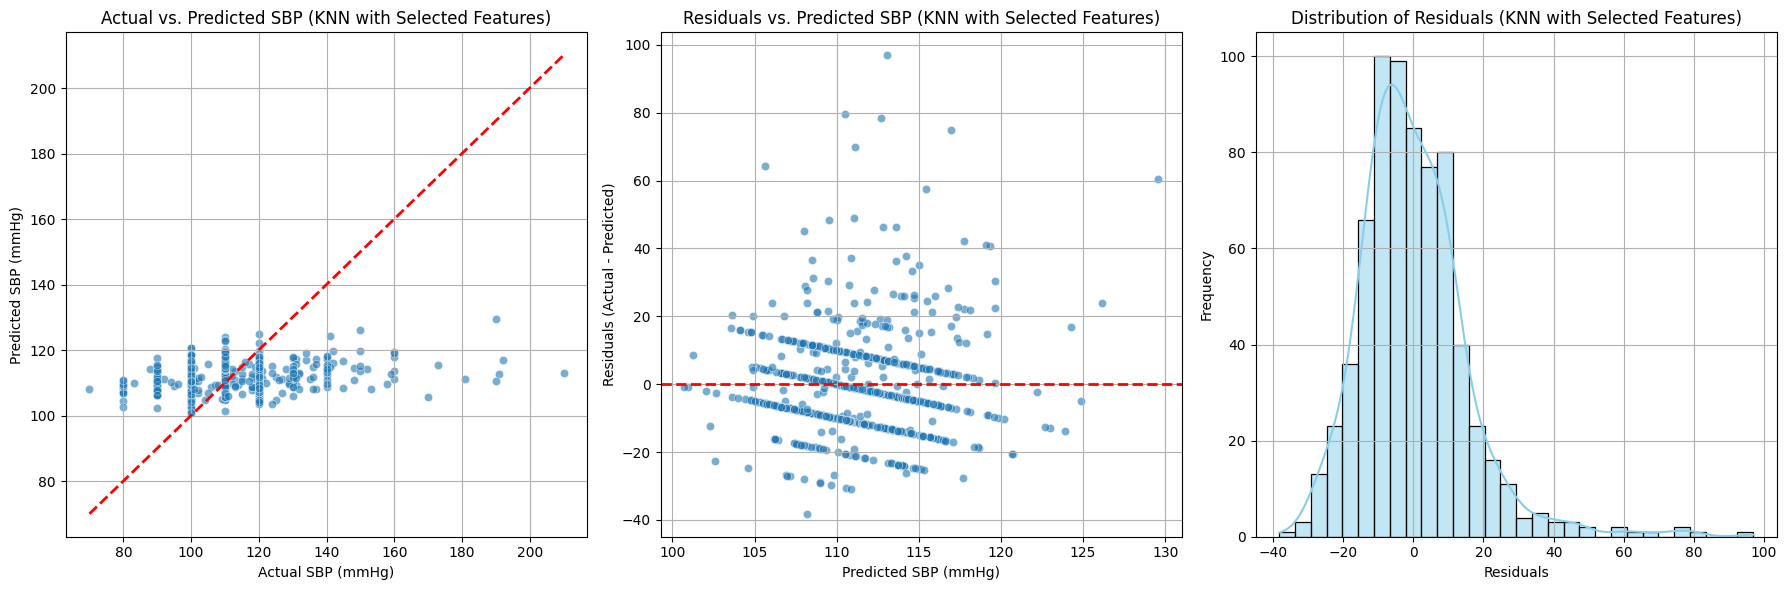

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a custom size
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs. Predicted Values
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x=y_test, y=y_pred_selected_features, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted SBP (KNN with Selected Features)')
plt.xlabel('Actual SBP (mmHg)')
plt.ylabel('Predicted SBP (mmHg)')
plt.grid(True)

# Calculate residuals
residuals_selected_features = y_test - y_pred_selected_features

# Plot 2: Residuals vs. Predicted Values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_selected_features, y=residuals_selected_features, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted SBP (KNN with Selected Features)')
plt.xlabel('Predicted SBP (mmHg)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Plot 3: Distribution of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_selected_features, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Residuals (KNN with Selected Features)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The features of both the training (`X_train`) and test (`X_test`) datasets were successfully standardized using `StandardScaler`.
*   The optimized KNN Regressor (with `n_neighbors=29`) was re-trained on the newly scaled training data.
*   Permutation importance was calculated for the re-trained KNN model to identify influential features.
    *   `BMI` was found to be the most important feature with an importance score of approximately 12.93.
    *   `male.gender` and `age` were the next most important features, with scores of approximately 8.36 and 5.50, respectively.
    *   `adv_HIV` showed a negative importance score of approximately -1.65, suggesting that its inclusion might slightly worsen the model's performance.
*   A subset of features with positive importance scores was selected, including `BMI`, `male.gender`, `age`, `hgb_centered`, `married`, `log_creat_centered`, `IPW_weight`, `urban.clinic`, and `survtime`.
*   A new KNN model was trained using only these selected and scaled features.
*   Evaluating the KNN model with selected features on the test set yielded the following performance metrics:
    *   Mean Absolute Error (MAE): 11.2961
    *   Mean Squared Error (MSE): 241.0612
    *   Root Mean Squared Error (RMSE): 15.5261
    *   R-squared (R2) Score: 0.0729
*   Visualizations including actual vs. predicted plots, residuals vs. predicted plots, and a distribution of residuals plot were generated to assess the model's performance.

### Insights or Next Steps

*   The KNN model, even after optimization and feature selection, exhibits a relatively low R-squared score of 0.0729, indicating that the selected features explain only a small proportion of the variance in the target variable. This suggests that the model has limited predictive power for the given task and features.
*   Consider exploring alternative regression models (e.g., Tree-based models, Linear Regression, or ensemble methods) or conducting further feature engineering, potentially creating interaction terms or polynomial features, to improve the model's explanatory power and predictive accuracy.
